In [1]:
import pandas as pd
import numpy as np
import keras
import livelossplot
import tensorflow as tf


##### Data from: https://www.kaggle.com/datasets/moltean/fruits
 Using the 100x100 image versions

In [2]:
seed = 0
tf.random.set_seed = seed

In [3]:
import os
cwd = os.getcwd()

cwd

'/Users/koa/Documents/ML Course/cnn'

In [4]:
tr_path = '/fruits-360/Training'
te_path = '/fruits-360/Test'

In [5]:
tr_dir = cwd+tr_path
te_dir = cwd+te_path

In [6]:
tr_dir

'/Users/koa/Documents/ML Course/cnn/fruits-360/Training'

In [7]:
from keras.utils import image_dataset_from_directory
import os


train = image_dataset_from_directory(tr_dir, 
                                 labels = 'inferred',
                                 label_mode = 'categorical', 
                                 color_mode='rgb', 
                                 image_size=(100,100))

train.class_names
test = image_dataset_from_directory(te_dir, 
                                 labels = 'inferred',
                                 label_mode = 'categorical', 
                                 color_mode='rgb', 
                                 image_size=(100,100))

Found 70491 files belonging to 141 classes.
Found 23619 files belonging to 141 classes.


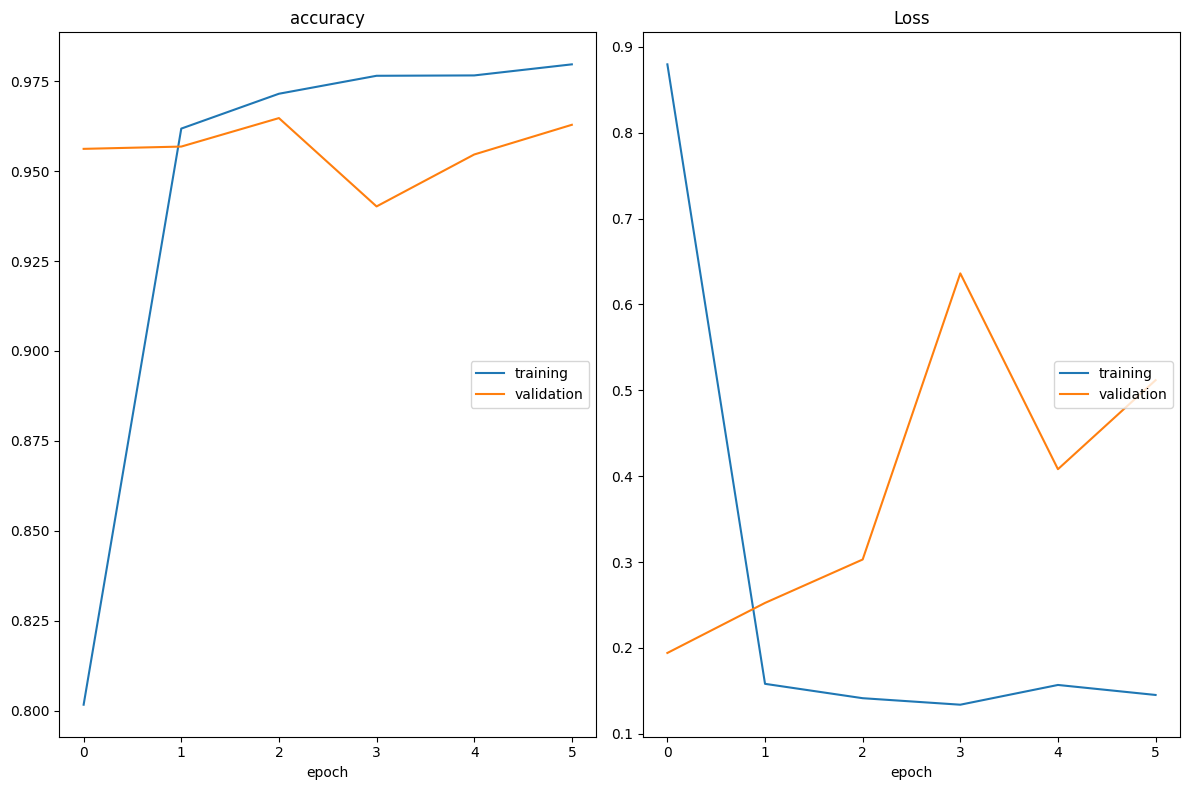

accuracy
	training         	 (min:    0.802, max:    0.980, cur:    0.980)
	validation       	 (min:    0.940, max:    0.965, cur:    0.963)
Loss
	training         	 (min:    0.134, max:    0.880, cur:    0.145)
	validation       	 (min:    0.194, max:    0.636, cur:    0.512)
2203/2203 ━━━━━━━━━━━━━━━━━━━━ 175s 79ms/step - accuracy: 0.9795 - loss: 0.1453 - val_accuracy: 0.9629 - val_loss: 0.5118
Epoch 6: early stopping


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from livelossplot import PlotLossesKeras
import keras

model = Sequential()


model.add(Conv2D(filters=16, kernel_size=2, activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.3))
model.add(Flatten())

model.add(Dense(units=150, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=141, activation='softmax'))


callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=1,
        mode='auto'
    ),
    PlotLossesKeras()
]

optimizer = RMSprop()


model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train, batch_size=32, epochs=50, 
          validation_data = test,
          callbacks=[PlotLossesKeras(),callbacks])



In [ ]:
model.save

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 99, 99, 16)     │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 22, 22, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7744)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │     1,161,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 141)            │        21,291 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,420,068 (9.23 MB)

 Trainable params: 1,210,033 (4.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,210,035 (4.62 MB)

In [10]:
loss, accuracy = model.evaluate(test)

739/739 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9641 - loss: 0.5120


In [51]:
print('Accuracy: ',accuracy)
print('Loss: ',loss)

Accuracy:  0.9663829803466797
Loss:  0.35494109988212585


In [11]:
y_test = np.concatenate([y for x, y in test], axis=0)

2025-02-14 12:25:04.893668: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
y_pred = model.predict(test)

y_pred

739/739 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step


array([[4.0687759e-32, 3.0111939e-38, 1.4005036e-19, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.1042508e-30, 0.0000000e+00, 4.0970735e-33, ..., 0.0000000e+00,
        1.8234394e-35, 7.9572598e-31],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.5822973e-37, ..., 0.0000000e+00,
        9.9972430e-33, 1.4228728e-27],
       [4.2951281e-30, 6.2545880e-33, 7.7314798e-36, ..., 0.0000000e+00,
        7.3443352e-33, 2.5914658e-32],
       [6.3022633e-36, 4.2698165e-33, 7.4184726e-26, ..., 0.0000000e+00,
        0.0000000e+00, 7.2568590e-26]], dtype=float32)

In [32]:
print(y_pred.shape)
print(y_test.shape)

(23619, 141)
(23619, 141)


In [19]:
from sklearn.metrics import confusion_matrix
#y_pred = (y_pred > 0.5)


cf_m = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

cf_m

array([[1, 0, 0, ..., 3, 1, 0],
       [1, 1, 1, ..., 2, 0, 0],
       [0, 2, 2, ..., 0, 0, 0],
       ...,
       [2, 1, 2, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [26]:
np.set_printoptions(threshold=np.inf)

n_features = cf_m.shape[0]

<Axes: >

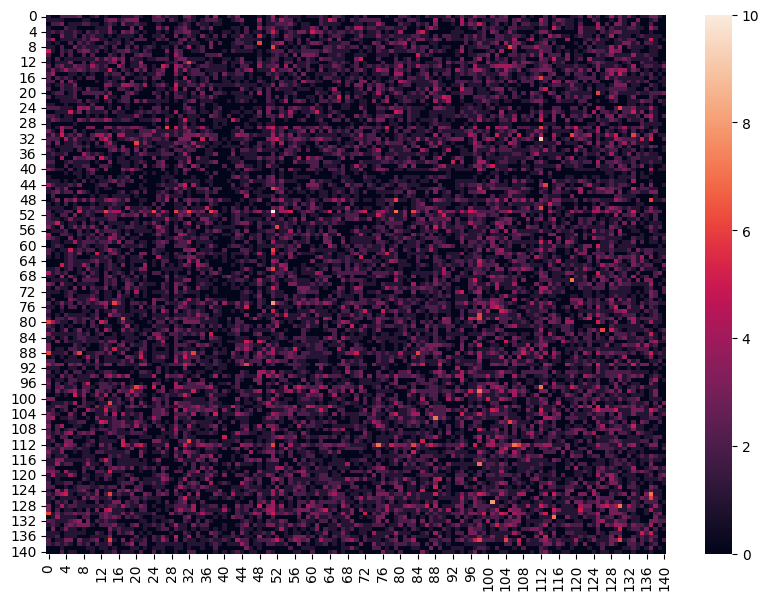

In [29]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


df_cm = pd.DataFrame(cf_m, index = [i for i in range(n_features)],
                  columns = [i for i in range(n_features)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=False)